In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:

df=pd.read_csv("Desktop/Promize IT/Universities.csv")
df.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [46]:
df.describe()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,1266.440000,76.480000,39.200000,12.72000,27388.000000,86.720000
std,108.359771,19.433905,19.727308,4.06735,14424.883165,9.057778
min,1005.000000,28.000000,14.000000,6.00000,8704.000000,67.000000
25%,1240.000000,74.000000,24.000000,11.00000,15140.000000,81.000000
50%,1285.000000,81.000000,36.000000,12.00000,27553.000000,90.000000
75%,1340.000000,90.000000,50.000000,14.00000,34870.000000,94.000000
max,1415.000000,100.000000,90.000000,25.00000,63575.000000,97.000000


In [65]:
df1.data = df.iloc[:,1:]
df1.head()

C:\Users\naresh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310,89,22,13,22704,94
1,1415,100,25,6,63575,81
2,1260,62,59,9,25026,72
3,1310,76,24,12,31510,88
4,1280,83,33,13,21864,90


In [66]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import sklearn as sk

In [67]:
df1_normal = scale(df1)
type(df1_normal)

C:\Users\naresh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


numpy.ndarray

In [68]:
df1_normal1 = pd.DataFrame(df1_normal)
df1_normal1.head()
type(df1_normal1)

pandas.core.frame.DataFrame

In [69]:
pcs = PCA()
pca_values = PCA().fit_transform(df1)
pca_values = pcs.fit_transform(df1)

In [70]:
var = pcs.explained_variance_ratio_
var


array([9.99975027e-01, 2.43012564e-05, 3.33798878e-07, 2.11914679e-07,
       1.08356060e-07, 1.80484225e-08])

In [71]:
pccomp = pd.DataFrame(pcs.components_)
pccomp

,0,1,2,3,4,5
0,0.005852,0.000824,-0.000764,-0.000220,0.999982,0.000247
1,-0.954952,-0.196203,0.202390,0.018262,0.005931,-0.090777
2,0.220837,0.020311,0.913045,-0.041486,-0.000537,-0.339773
3,-0.190358,0.972296,0.019795,0.131164,0.000364,-0.028422
4,0.022845,-0.028998,-0.347180,0.098581,-0.000123,-0.931872
5,0.050049,-0.122026,0.066787,0.985405,0.000055,0.084386


In [72]:
var

array([9.99975027e-01, 2.43012564e-05, 3.33798878e-07, 2.11914679e-07,
       1.08356060e-07, 1.80484225e-08])

In [73]:
cumvar = np.cumsum(np.round(var,decimals = 4)*100)
cumvar


array([100., 100., 100., 100., 100., 100.])

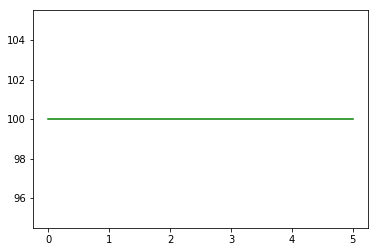

In [76]:
plt.plot(cumvar,color="green")
plt.show()

In [75]:
pcs = pd.DataFrame(pca_values)
pcs

,0,1,2,3,4,5
0,-4683.636503,-75.971220,-5.800919,1.665508,0.422811,0.136040
1,36187.255229,65.660603,3.114855,6.760791,7.862298,-1.495974
2,-2362.025493,0.257815,22.785853,-13.390310,7.039316,-2.270882
3,4122.193187,-20.262163,-6.886367,-7.690025,4.515827,0.848944
4,-5523.811429,-48.537972,-0.694342,1.568162,-0.076814,-0.282388
5,4774.370772,-48.468790,-3.555728,-1.004676,-1.629008,-0.646946
6,4197.229791,-26.760047,-2.438227,4.917449,-4.391319,0.386370
7,-7261.926598,-35.227520,-14.320466,-3.422338,0.988936,-1.948743
8,12137.599555,-64.474132,-3.156250,-7.905314,0.138256,3.070299
9,31302.664668,149.963047,-3.795222,1.951788,-5.414547,-1.458823


In [77]:
df2 = pd.DataFrame(pca_values[:,0:3])
df2.head()

,0,1,2
0,-4683.636503,-75.971220,-5.800919
1,36187.255229,65.660603,3.114855
2,-2362.025493,0.257815,22.785853
3,4122.193187,-20.262163,-6.886367
4,-5523.811429,-48.537972,-0.694342


In [78]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
kmeans.fit(df2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [87]:
m1 = KMeans(n_clusters = 2)
m1.fit(df2)
m1.labels_


array([0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1])

In [88]:
from sklearn.cluster import AgglomerativeClustering as a
cluster=a(n_clusters=2,affinity='euclidean',linkage='ward')
Y=cluster.fit_predict(df2)

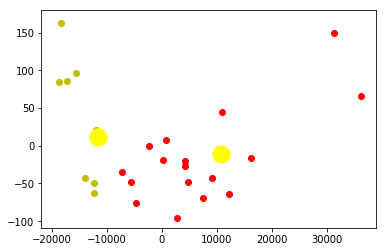

In [89]:
from matplotlib import pyplot as plt
plt.scatter(df2[Y==0,0],df2[Y==0,1],c='r')
plt.scatter(df2[Y==1,0],df2[Y==1,1],c='y')
plt.scatter(df2[Y==2,0],df2[Y==2,1],c='c')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='yellow',s=300)



plt.show()

In [95]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.preprocessing import scale

In [96]:
X=df[['SAT','Top10','Accept','SFRatio','Expenses']]
X.head()

,SAT,Top10,Accept,SFRatio,Expenses
0,1310,89,22,13,22704
1,1415,100,25,6,63575
2,1260,62,59,9,25026
3,1310,76,24,12,31510
4,1280,83,33,13,21864


In [97]:
y=df['GradRate']

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(22, 5)
(3, 5)
(22,)
(3,)


In [111]:
model_knn = KNeighborsClassifier(n_neighbors = 3, metric='euclidean')

model_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [112]:
model_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [113]:
y_predict = model_knn.predict(X_test)
np.mean(y_predict == y_test)

0.3333333333333333

In [114]:
confusion_matrix(y_predict,y_test)

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1]], dtype=int64)

In [115]:
accuracy_score(y_predict,y_test)

0.3333333333333333